### Breast cancer Description
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        - class:
                - WDBC-Malignant
                - WDBC-Benign

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


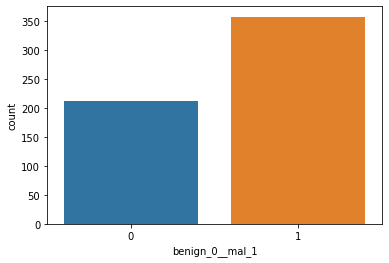

In [5]:
# Seems like the dataset is balanced

sns.countplot(df.benign_0__mal_1)

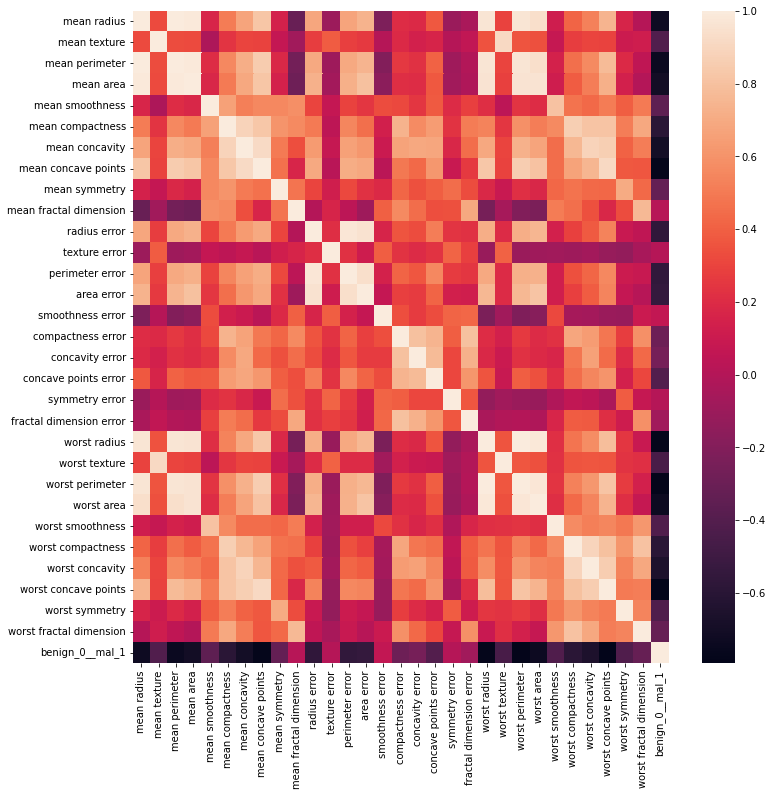

In [6]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

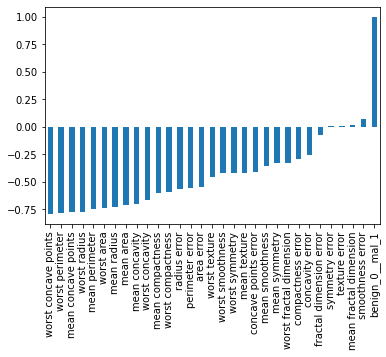

In [7]:
# If we want to see the corealtion value and plot a bar graph.

df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

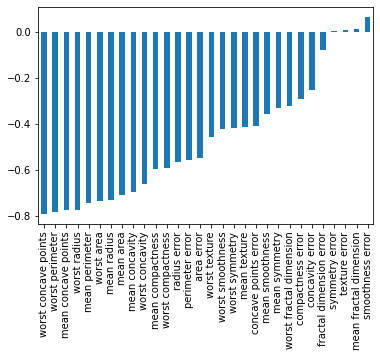

In [8]:
# The last column is output itself (column which we are comparing inside sqaure bracket),
# So we can exclude that

df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

### Train Test Split

In [9]:
X = df.drop('benign_0__mal_1', axis=1)
y = df['benign_0__mal_1']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

###Scaling of data

In [11]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

In [12]:
X_train = scalar.fit_transform(X_train)
X_train.shape

(426, 30)

In [13]:
X_test = scalar.transform(X_test)
X_test.shape

(143, 30)

### Simple Model Creation and Execution

In [14]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
model = Sequential()
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation = 'sigmoid')) # OUtput layer & sigmoid beacuse its binary classification

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=600)

Epoch 1/600
14/14 [==============================] - 1s 20ms/step - loss: 0.6853 - accuracy: 0.6315 - val_loss: 0.6760 - val_accuracy: 0.6224
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6605 - accuracy: 0.7230 - val_loss: 0.6521 - val_accuracy: 0.7483
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6334 - accuracy: 0.7746 - val_loss: 0.6209 - val_accuracy: 0.7902
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5985 - accuracy: 0.7864 - val_loss: 0.5817 - val_accuracy: 0.8252
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5555 - accuracy: 0.8474 - val_loss: 0.5349 - val_accuracy: 0.8671
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5097 - accuracy: 0.8803 - val_loss: 0.4848 - val_accuracy: 0.9021
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4596 - accuracy: 0.8920 - val_loss: 0.4337 - val_accuracy: 0.9371
Epoch 8/600


### Evaluation of model

In [18]:
loss = pd.DataFrame(model.history.history)
loss

,loss,accuracy,val_loss,val_accuracy
0,0.685295,0.631455,0.675985,0.622378
1,0.660483,0.723005,0.652093,0.748252
2,0.633447,0.774648,0.620864,0.790210
3,0.598495,0.786385,0.581694,0.825175
4,0.555461,0.847418,0.534949,0.867133
...,...,...,...,...
595,0.030026,0.983568,0.229256,0.944056
596,0.029695,0.990610,0.223999,0.937063
597,0.023449,0.985915,0.210728,0.944056
598,0.023994,0.985915,0.241309,0.937063


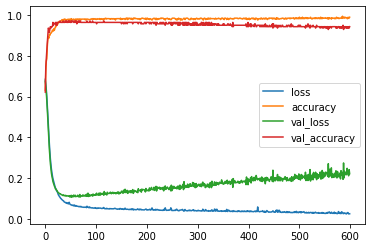

In [19]:
# even though model is giving a good accuracy,
# we can see that after a particular point validation loss is increasing.
# Thus we can say that running model for this much epochs leads to model overfitting.

loss.plot()

### Model Execution with early stopping

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
early_stop = EarlyStopping(mode='min', monitor='val_loss', patience=25, verbose=1)

In [22]:
model = Sequential()
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=600, callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 19ms/step - loss: 0.6589 - accuracy: 0.7488 - val_loss: 0.6341 - val_accuracy: 0.8462
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6138 - accuracy: 0.8380 - val_loss: 0.5880 - val_accuracy: 0.8601
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5679 - accuracy: 0.8545 - val_loss: 0.5370 - val_accuracy: 0.8881
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5172 - accuracy: 0.8662 - val_loss: 0.4847 - val_accuracy: 0.8881
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4662 - accuracy: 0.8756 - val_loss: 0.4299 - val_accuracy: 0.9021
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4161 - accuracy: 0.8756 - val_loss: 0.3804 - val_accuracy: 0.9091
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3718 - accuracy: 0.8897 - val_loss: 0.3364 - val_accuracy: 0.9091
Epoch 8/600


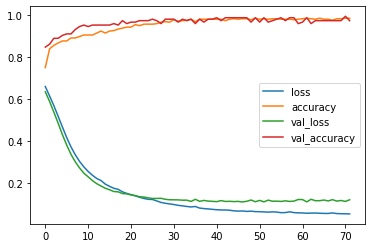

In [26]:
loss = pd.DataFrame(model.history.history)
loss.plot()

Model Execution with Dropouts

In [27]:
from tensorflow.keras.layers import Dropout, Dense

In [28]:
model = Sequential()
model.add(Dense(32, activation='relu'))
model.add(Dropout(.5)) # Disbale 50 percent of neuron from above dense layer
model.add(Dense(16, activation='relu'))
model.add(Dropout(.5))

model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=600,
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.6841 - accuracy: 0.5962 - val_loss: 0.6597 - val_accuracy: 0.7972
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6674 - accuracy: 0.5751 - val_loss: 0.6357 - val_accuracy: 0.8671
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6426 - accuracy: 0.6808 - val_loss: 0.6127 - val_accuracy: 0.9021
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6352 - accuracy: 0.6925 - val_loss: 0.5892 - val_accuracy: 0.8951
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5997 - accuracy: 0.7488 - val_loss: 0.5635 - val_accuracy: 0.9021
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6013 - accuracy: 0.6878 - val_loss: 0.5320 - val_accuracy: 0.9021
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5444 - accuracy: 0.7817 - val_loss: 0.5005 - val_accuracy: 0.9161
Epoch 8/600


In [33]:
loss = pd.DataFrame(model.history.history)

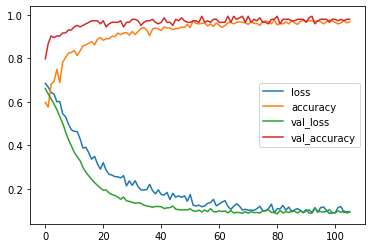

In [32]:
loss.plot()